In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'cover_overview.csv')

# Load the CSV file
df = pd.read_csv(file_path)

# Drop the first column by index
df = df.drop(df.columns[0], axis=1)

# Renaming columns
df.rename(
    columns={'WMU ': 'WMU', 'Simulation': 'Simulation', 'Design': 'Design', 'Mean_Sampler_Count': 'Mean sampler count',
             'Mean_Cover_Area': 'Mean cover area (km2)', 'Mean_Cover_Percentage': 'Mean cover (%)',
             'Mean_Line_Length': 'Mean line length (km)', 'Mean_Trackline_Length': 'Mean trackline length (km)',
             'Mean_Cyclic_Trackline_Length': 'Mean cyclic trackline length (km)',
             'Mean_On_Effort': 'Mean on effort (km)', 'Mean_Off_Effort': 'Mean off effort (km)',
             'Mean_Return_to_Home': 'Mean return to home (km)',
             'Mean_Off_Effort_Return': 'Mean off effort & return (km)', 'On_Effort_Percentage': 'On effort (%)',
             'Off_Effort_Percentage': 'Off effort (%)', 'Return_to_Home_Percentage': 'Return to home (%)',
             'Off_Effort_Return_Percentage': 'Off effort & return (%)', 'Number_of_Plots': 'Number of plots'},
    inplace=True)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys-2C': 'Fixed-wing Systematic 2 Cameras',
    'FW-ZZ-2C': 'Fixed-wing Zigzag 2 Cameras',
    'FW-Sys-G': 'Fixed-wing Systematic Gimbal',
    'FW-ZZ-G': 'Fixed-wing Zigzag Gimbal',
    'QC-Sys-NADIR': 'Quadcopter NADIR',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter',
    'FW-Seg-G' : 'Fixed-wing Segmented Grid Gimbal'
}
# # Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)

# Convert the Simulation column to a categorical type with the specified order
# df['Simulation'] = pd.Categorical(df['Simulation'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the Simulation column
df = df.sort_values('Simulation')


In [17]:
print(df)
print(df.columns)

    WMU                        Simulation         Design  Mean sampler count  \
0   501  Fixed-wing Segmented Grid Gimbal  segmentedgrid               201.9   
24  517  Fixed-wing Segmented Grid Gimbal  segmentedgrid               423.5   
32  528  Fixed-wing Segmented Grid Gimbal  segmentedgrid              1002.6   
8   503  Fixed-wing Segmented Grid Gimbal  segmentedgrid               293.2   
16  512  Fixed-wing Segmented Grid Gimbal  segmentedgrid               678.4   
33  528   Fixed-wing Systematic 2 Cameras     systematic               980.0   
17  512   Fixed-wing Systematic 2 Cameras     systematic               531.8   
9   503   Fixed-wing Systematic 2 Cameras     systematic               231.0   
25  517   Fixed-wing Systematic 2 Cameras     systematic               340.0   
1   501   Fixed-wing Systematic 2 Cameras     systematic               201.6   
34  528      Fixed-wing Systematic Gimbal     systematic               980.0   
2   501      Fixed-wing Systematic Gimba

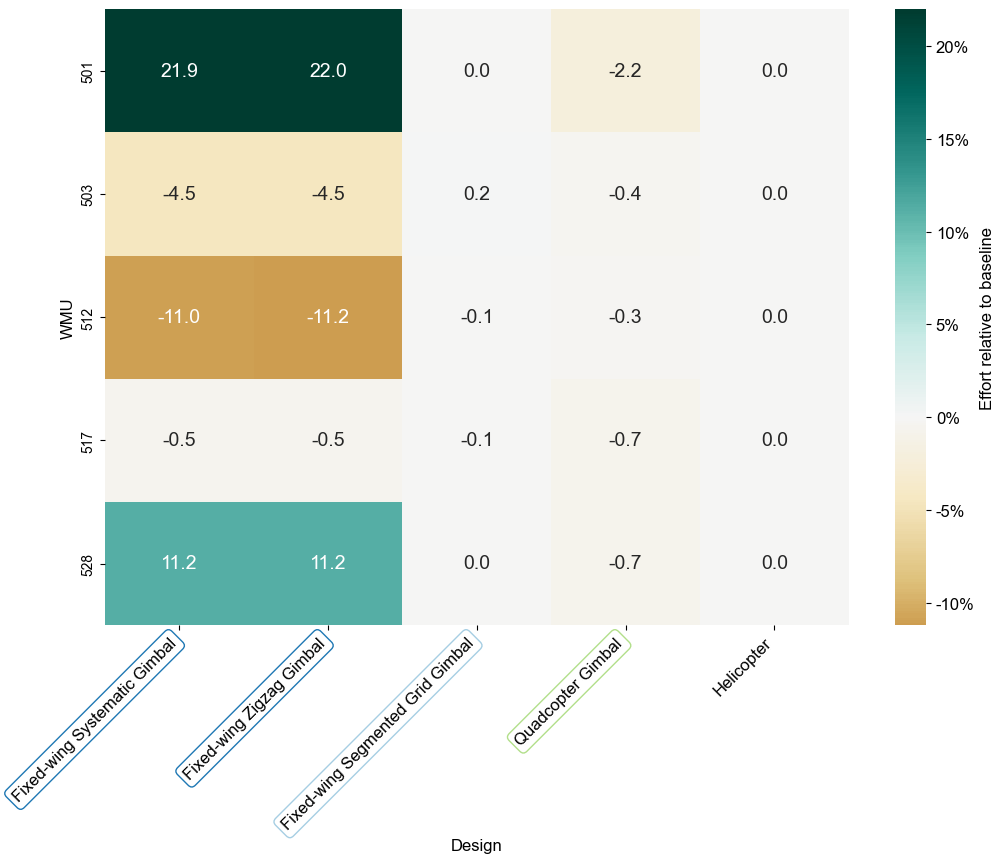

In [19]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['WMU', 'Simulation', 'Mean line length (km)']]

# Select only the desired simulations
desired_simulations = ['Fixed-wing Systematic Gimbal', 'Fixed-wing Zigzag Gimbal', 'Fixed-wing Segmented Grid Gimbal', 'Quadcopter Gimbal',
                       'Helicopter']  # Replace with your actual simulation names
df_filtered = df_filtered[df_filtered['Simulation'].isin(desired_simulations)]

# Manually order by simulations with 'Helicopter' in the last position
df_filtered['Simulation'] = pd.Categorical(df_filtered['Simulation'], categories=desired_simulations, ordered=True)
df_filtered = df_filtered.sort_values('Simulation')

# Pivot the DataFrame to have WMU as index and Simulation as columns
df_pivot = df_filtered.pivot(index='WMU', columns='Simulation', values='Mean line length (km)')

# Calculate the proportional difference from H-SG for each WMU
df_diff = df_pivot.subtract(df_pivot['Helicopter'], axis=0).divide(df_pivot['Helicopter'], axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 8))


# Define a custom annotation function to add a percentage sign
def annot_format(data):
    return f'{data:.1f}%'


ax = sns.heatmap(df_diff, cmap='BrBG', center=0, annot=True, fmt='.1f', annot_kws={"size": 14},
                 cbar_kws={'format': '%.0f%%'})

# Define colors for each group of simulations
colors = ['#1f78b4', '#1f78b4', '#a6cee3', '#b2df8a']

# Add colored borders around the x-axis labels
for tick_label, color in zip(ax.get_xticklabels(), colors):
    tick_label.set_bbox(dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

# Keep the font color black
for tick_label in ax.get_xticklabels():
    tick_label.set_color('black')

# Rotate x-axis labels to 45 degrees and increase font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add labels and title
plt.xlabel('Design', fontsize=12)
plt.ylabel('WMU', fontsize=12)

# Add a legend for the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Effort relative to baseline', size=12)
cbar.ax.tick_params(labelsize=12)

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'relEffortHeatmap.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')

plt.show()

In [39]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'coverage_score.csv')

# Load the CSV file
coverage_df = pd.read_csv(file_path)

# Drop the first column by index
coverage_df = coverage_df.drop(coverage_df.columns[0], axis=1)

coverage_df.loc[coverage_df['Simulation'].str.startswith('FW_Seg_G_design', na=False), 'Group'] = 'Fixed-wing Segmented Grid Gimbal'

# Renaming columns
coverage_df.rename(
    columns={'Simulation': 'Simulation', 'Min  ': 'Min  ', 'First_Qu': 'First quantile', 'Median': 'Median',
             'Mean': 'Mean', 'Third_Qu': 'Third quantile', 'Max': 'Max', 'Group': 'Group'}, inplace=True)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW_Sys_2C': 'Fixed-wing Systematic 2 Cameras',
    'FW_ZZ_2C': 'Fixed-wing Zigzag 2 Cameras',
    'FW_Sys_G': 'Fixed-wing Systematic Gimbal',
    'FW_ZZ_G': 'Fixed-wing Zigzag Gimbal',
    'QC_Sys_nadir': 'Quadcopter Nadir',
    'QC_Sys': 'Quadcopter Gimbal',
    'H_SG': 'Helicopter',
    'FW-Seg-G' : 'Fixed-wing Segmented Grid Gimbal'
}

# Renaming the simulations
coverage_df['Group'] = coverage_df['Group'].replace(simulation_rename_dict)

# Define the custom order for the groups
custom_order = ['Fixed-wing Systematic 2 Cameras', 'Fixed-wing Zigzag 2 Cameras', 'Fixed-wing Systematic Gimbal',
                'Fixed-wing Zigzag Gimbal', 'Fixed-wing Segmented Grid Gimbal', 'Quadcopter Nadir', 'Quadcopter Gimbal', 'Helicopter']

# Convert the Group column to a categorical type with the specified order
coverage_df['Group'] = pd.Categorical(coverage_df['Group'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the Group column
coverage_df = coverage_df.sort_values('Group')

# Define custom colors for each group
group_colors = {
    "Fixed-wing Systematic 2 Cameras": "#1f78b4",  # Orange
    "Fixed-wing Zigzag 2 Cameras": "#1f78b4",  # Purple
    "Fixed-wing Systematic Gimbal": "#1f78b4",  # Orange
    "Fixed-wing Zigzag Gimbal": "#1f78b4",  # Purple
    'Fixed-wing Segmented Grid Gimbal': "#1f78b4",
    "Quadcopter Nadir": "#a6cee3",  # Dark Purple
    "Quadcopter Gimbal": "#a6cee3",  # Dark Purple
    "Helicopter": "#b2df8a"  # Pink
}


In [40]:
print(coverage_df)
print(coverage_df.columns)

                 Simulation   Min  First quantile  Median      Mean  \
9      FW_Sys_2C_design_528  0.41            0.68    0.71  0.710847   
5      FW_Sys_2C_design_501  0.00            0.00    0.00  0.197736   
6      FW_Sys_2C_design_503  0.00            0.00    0.00  0.153453   
7      FW_Sys_2C_design_512  0.00            0.00    0.00  0.147334   
8      FW_Sys_2C_design_517  0.00            0.00    0.00  0.162268   
17      FW_ZZ_2C_design_512  0.00            0.00    0.00  0.147028   
16      FW_ZZ_2C_design_503  0.00            0.00    0.00  0.153307   
15      FW_ZZ_2C_design_501  0.00            0.00    0.00  0.199149   
18      FW_ZZ_2C_design_517  0.00            0.00    0.00  0.160263   
19      FW_ZZ_2C_design_528  0.38            0.67    0.71  0.707238   
10      FW_Sys_G_design_501  0.00            0.00    0.00  0.277568   
11      FW_Sys_G_design_503  0.00            0.00    0.00  0.215245   
12      FW_Sys_G_design_512  0.00            0.00    0.00  0.206807   
13    

/tmp/ipykernel_4973/1038939838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)


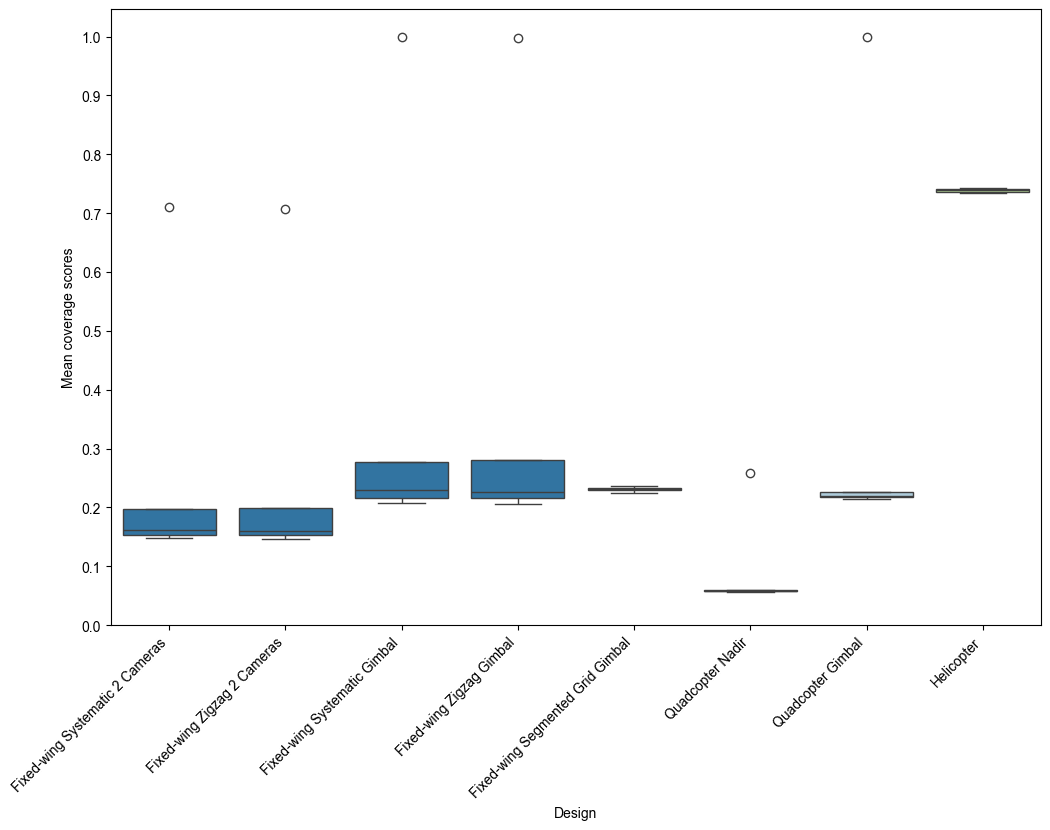

In [41]:
# Create a color palette based on the group colors
palette = [group_colors[group] for group in coverage_df['Group'].unique()]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)

# Create custom legend
# handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
# plt.legend(handles=handles, title='Group')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.xlabel('Design')
plt.ylabel('Mean coverage scores')

# Set y-axis ticks from 0 to 1 at steps of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'meanCoverage.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
coverage_df

,Simulation,Min,First quantile,Median,Mean,Third quantile,Max,Group
9,FW_Sys_2C_design_528,0.41,0.68,0.71,0.710847,0.74,0.82,Fixed-wing Systematic 2 Cameras
5,FW_Sys_2C_design_501,0.00,0.00,0.00,0.197736,0.64,0.85,Fixed-wing Systematic 2 Cameras
6,FW_Sys_2C_design_503,0.00,0.00,0.00,0.153453,0.00,0.81,Fixed-wing Systematic 2 Cameras
7,FW_Sys_2C_design_512,0.00,0.00,0.00,0.147334,0.00,0.84,Fixed-wing Systematic 2 Cameras
8,FW_Sys_2C_design_517,0.00,0.00,0.00,0.162268,0.00,0.80,Fixed-wing Systematic 2 Cameras
17,FW_ZZ_2C_design_512,0.00,0.00,0.00,0.147028,0.00,0.90,Fixed-wing Zigzag 2 Cameras
16,FW_ZZ_2C_design_503,0.00,0.00,0.00,0.153307,0.00,0.96,Fixed-wing Zigzag 2 Cameras
15,FW_ZZ_2C_design_501,0.00,0.00,0.00,0.199149,0.63,0.93,Fixed-wing Zigzag 2 Cameras
18,FW_ZZ_2C_design_517,0.00,0.00,0.00,0.160263,0.00,0.95,Fixed-wing Zigzag 2 Cameras
19,FW_ZZ_2C_design_528,0.38,0.67,0.71,0.707238,0.75,0.95,Fixed-wing Zigzag 2 Cameras


/tmp/ipykernel_4973/524555896.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = coverage_df.groupby('Group').agg({
/tmp/ipykernel_4973/524555896.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)


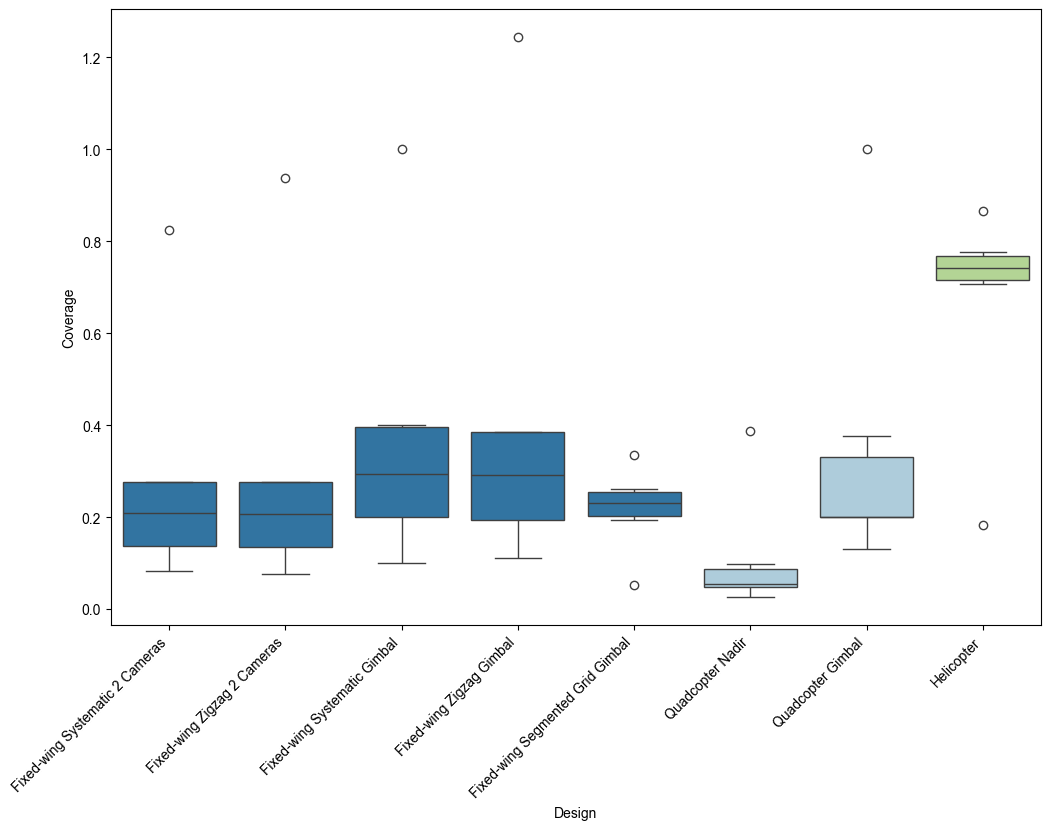

In [43]:
# Calculate the required statistics for each simulation
aggregated_df = coverage_df.groupby('Group').agg({
    'Min': 'mean',
    'First quantile': 'mean',
    'Median': 'mean',
    'Mean': 'mean',
    'Third quantile': 'mean',
    'Max': 'mean'
}).reset_index()

# Melt the dataframe
melted_df = aggregated_df.melt(id_vars=['Group'], var_name='Metric', value_name='Value')

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)

# Create custom legend
# handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
# plt.legend(handles=handles, title='Design')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.xlabel('Design')
plt.ylabel('Coverage')
# plt.title('Box Plot Grouped by Simulation with Custom Colors')
plt.show()